# Preliminaries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib import pyplot as plt
from matplotlib import cm
import msgpack

from stellarpunk import econ_sim, serialization

In [2]:
%load_ext autoreload
%autoreload 1
%aimport stellarpunk.serialization
%aimport stellarpunk.econ_sim

# Data Loading

In [3]:
#production_chain_df = pd.DataFrame(msgpack.unpackb(open("/tmp/production_chain.log", "rb").read(), object_hook=serialization.decode_matrix))
production_chain = serialization.load_production_chain(open("/tmp/production_chain.log", "rb").read())
production_chain_df = production_chain.adj_matrix

In [4]:
production_chain_df.shape

(28, 28)

In [5]:
agent_goods_df = pd.DataFrame(msgpack.unpackb(open("/tmp/agent_goods.log", "rb").read(), object_hook=serialization.decode_matrix))

In [6]:
agent_goods_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
production_goods = agent_goods_df @ production_chain_df.T

## Loading Other Data

In [8]:
buy_price_df = econ_sim.read_tick_log_to_df(open("/tmp/buy_prices.log", "rb"), index_name="agent").reset_index()
buy_budget_df = econ_sim.read_tick_log_to_df(open("/tmp/buy_budget.log", "rb"), index_name="agent").reset_index()
sell_price_df = econ_sim.read_tick_log_to_df(open("/tmp/sell_prices.log", "rb"), index_name="agent").reset_index()
max_buy_price_df = econ_sim.read_tick_log_to_df(open("/tmp/max_buy_prices.log", "rb"), index_name="agent").reset_index()
min_sell_price_df = econ_sim.read_tick_log_to_df(open("/tmp/min_sell_prices.log", "rb"), index_name="agent").reset_index()

In [9]:
columns = ["tick", "seller", "buyer", "product", "amount", "price"]
transaction_df = pd.read_csv("/tmp/transactions.log", sep="\t", header=None, names=columns)

In [10]:
transaction_df["value"] = transaction_df["amount"] * transaction_df["price"]

# Transactions

## Market Overview

In [11]:
transaction_df.groupby("product")[["amount", "value"]].sum()

,amount,value
product,,
0,106840.0,1.012860e+06
1,83726.0,1.130174e+06
2,126732.0,1.488269e+06
3,157713.0,4.340791e+05
4,99979.0,1.218599e+06
5,106804.0,1.042726e+06
6,83691.0,1.153046e+06
7,126714.0,2.296366e+06
8,157695.0,1.367241e+07


Text(0.5, 1.0, 'transaction count by tick')

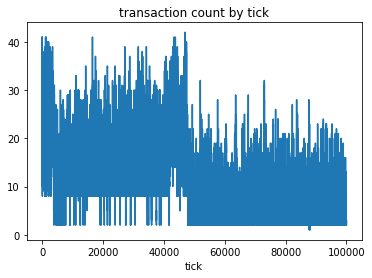

In [12]:
transaction_df.groupby("tick")["price"].count().plot()
plt.title("transaction count by tick")

Text(0.5, 1.0, 'product 0 transaction count per tick')

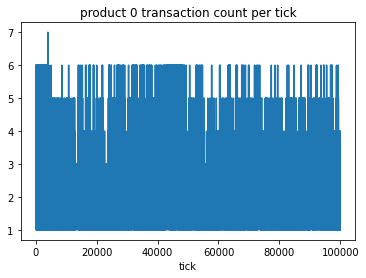

In [13]:
transaction_df[transaction_df["product"] == 0].groupby("tick")["price"].count().plot()
plt.title("product 0 transaction count per tick")

Text(0.5, 1.0, 'transaction unit quantity per tick')

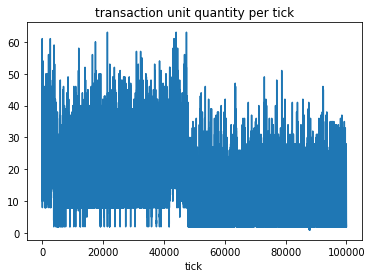

In [14]:
transaction_df.groupby("tick")["amount"].sum().plot()
plt.title("transaction unit quantity per tick")

Text(0.5, 1.0, 'transaction value per tick')

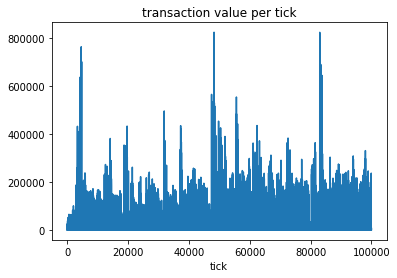

In [15]:
transaction_df.groupby("tick")["value"].sum().plot()
plt.title("transaction value per tick")

Text(0.5, 1.0, 'distinct products sold per tick')

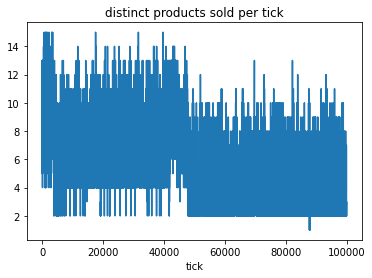

In [16]:
transaction_df.groupby("tick")["product"].nunique().plot()
plt.title("distinct products sold per tick") 

Text(0.5, 1.0, 'distinct sellers per tick')

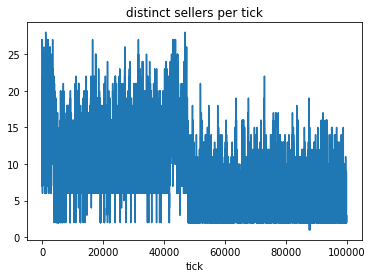

In [17]:
transaction_df.groupby("tick")["seller"].nunique().plot()
plt.title("distinct sellers per tick")

Text(0.5, 1.0, 'distinct buyers per tick')

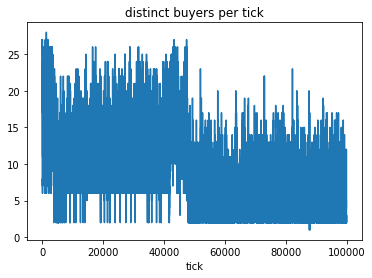

In [18]:
transaction_df.groupby("tick")["buyer"].nunique().plot()
plt.title("distinct buyers per tick")

In [19]:
transaction_df["seller"].nunique()

84

In [20]:
transaction_df["buyer"].nunique()

80

In [21]:
transaction_df["product"].nunique()

25

<AxesSubplot:>

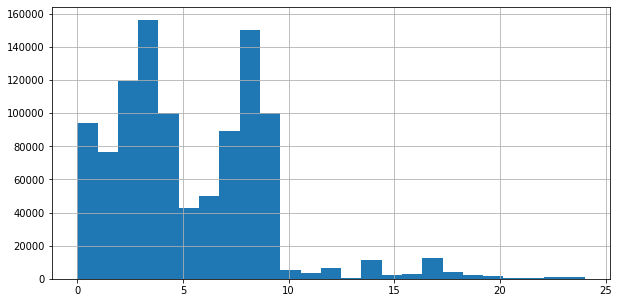

In [22]:
plt.figure(figsize=(10,5))
transaction_df["product"].hist(bins=transaction_df["product"].nunique())

Text(0.5, 1.0, 'max product id sold each tick')

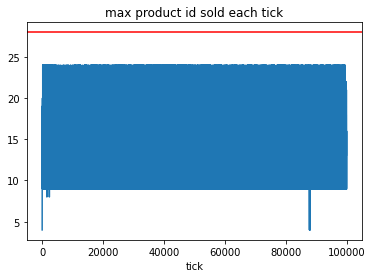

In [23]:
transaction_df.groupby("tick")["product"].max().plot()
plt.axhline(production_chain_df.shape[1], color="red")
plt.title("max product id sold each tick")

## Further Exploration

In [24]:
transaction_df[transaction_df["seller"] == 3]["price"].describe()

count    104122.000000
mean          2.753722
std           0.077094
min           2.579100
25%           2.789507
50%           2.789507
75%           2.789507
max           2.992500
Name: price, dtype: float64

Text(0.5, 1.0, 'price of product 0 over time')

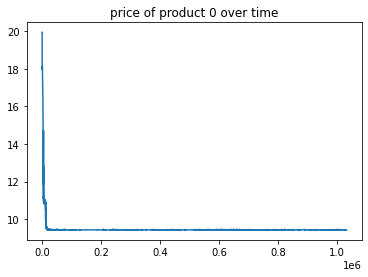

In [25]:
transaction_df[transaction_df["seller"] == 0]["price"].plot()
plt.title("price of product 0 over time")

Text(0.5, 1.0, 'price of product 2 over time')

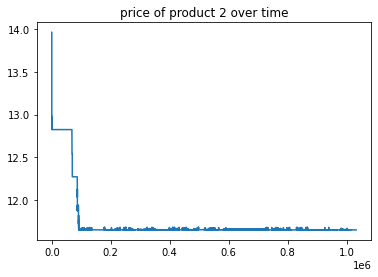

In [26]:
transaction_df[transaction_df["seller"] == 2]["price"].plot()
plt.title("price of product 2 over time")

Text(0.5, 1.0, 'price of product 6 over time')

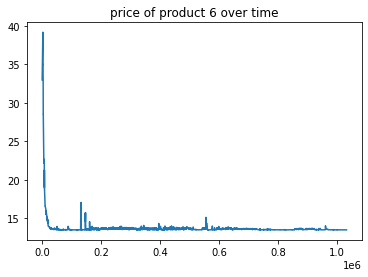

In [27]:
transaction_df[transaction_df["seller"] == 6]["price"].plot()
plt.title("price of product 6 over time")

<AxesSubplot:>

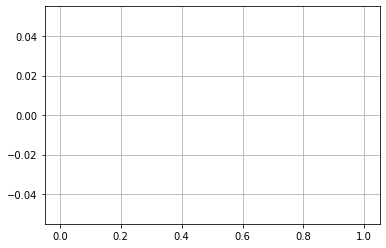

In [28]:
transaction_df[transaction_df["buyer"] == 3]["price"].hist()

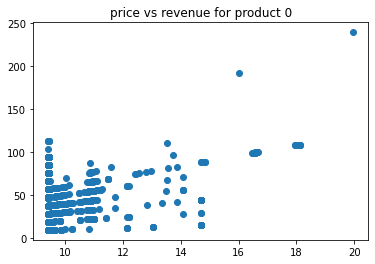

In [29]:
plt.scatter(transaction_df[transaction_df["product"] == 0].groupby("tick")["price"].mean(), transaction_df[transaction_df["product"] == 0].groupby("tick")["value"].sum())
plt.title("price vs revenue for product 0")
plt.show()

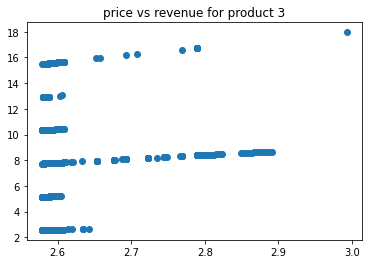

In [30]:
plt.scatter(transaction_df[transaction_df["product"] == 3].groupby("tick")["price"].mean(), transaction_df[transaction_df["product"] == 3].groupby("tick")["value"].sum())
plt.title("price vs revenue for product 3")
plt.show()

In [31]:
transaction_df[(transaction_df["price"] > 12) & (transaction_df["product"] == 0)]

,tick,seller,buyer,product,amount,price,value
0,1,0,5,0,2.0,19.950000,39.900000
1,1,0,34,0,2.0,19.950000,39.900000
2,1,0,58,0,2.0,19.950000,39.900000
3,1,0,72,0,2.0,19.950000,39.900000
4,1,0,78,0,2.0,19.950000,39.900000
...,...,...,...,...,...,...,...
4523,177,32,78,0,1.0,12.828258,12.828258
4543,178,0,78,0,1.0,12.828258,12.828258
4564,179,0,78,0,1.0,12.828258,12.828258
4588,180,32,78,0,1.0,12.379177,12.379177


## Transaction Graph

In [32]:
transaction_df.groupby(["buyer", "seller"])["amount"].sum().to_frame().reset_index()

,buyer,seller,amount
0,5,0,12631.0
1,5,32,6301.0
2,5,47,6.0
3,6,1,8233.0
4,6,37,4433.0
...,...,...,...
402,99,58,2687.0
403,99,72,2815.0
404,99,78,3094.0
405,99,91,3286.0


In [33]:
G = nx.from_pandas_edgelist(
    transaction_df.groupby(["buyer", "seller"])["amount"].sum().to_frame().reset_index(),
    source="seller", target="buyer", edge_attr="amount", create_using=nx.DiGraph)

In [34]:
labels = pd.DataFrame(transaction_df.groupby("seller")["product"].first()).apply(lambda x: f'{x.name}:{x["product"]}', axis=1)

In [35]:
G = nx.relabel_nodes(G, labels)

In [36]:
nx.is_directed_acyclic_graph(G)

True

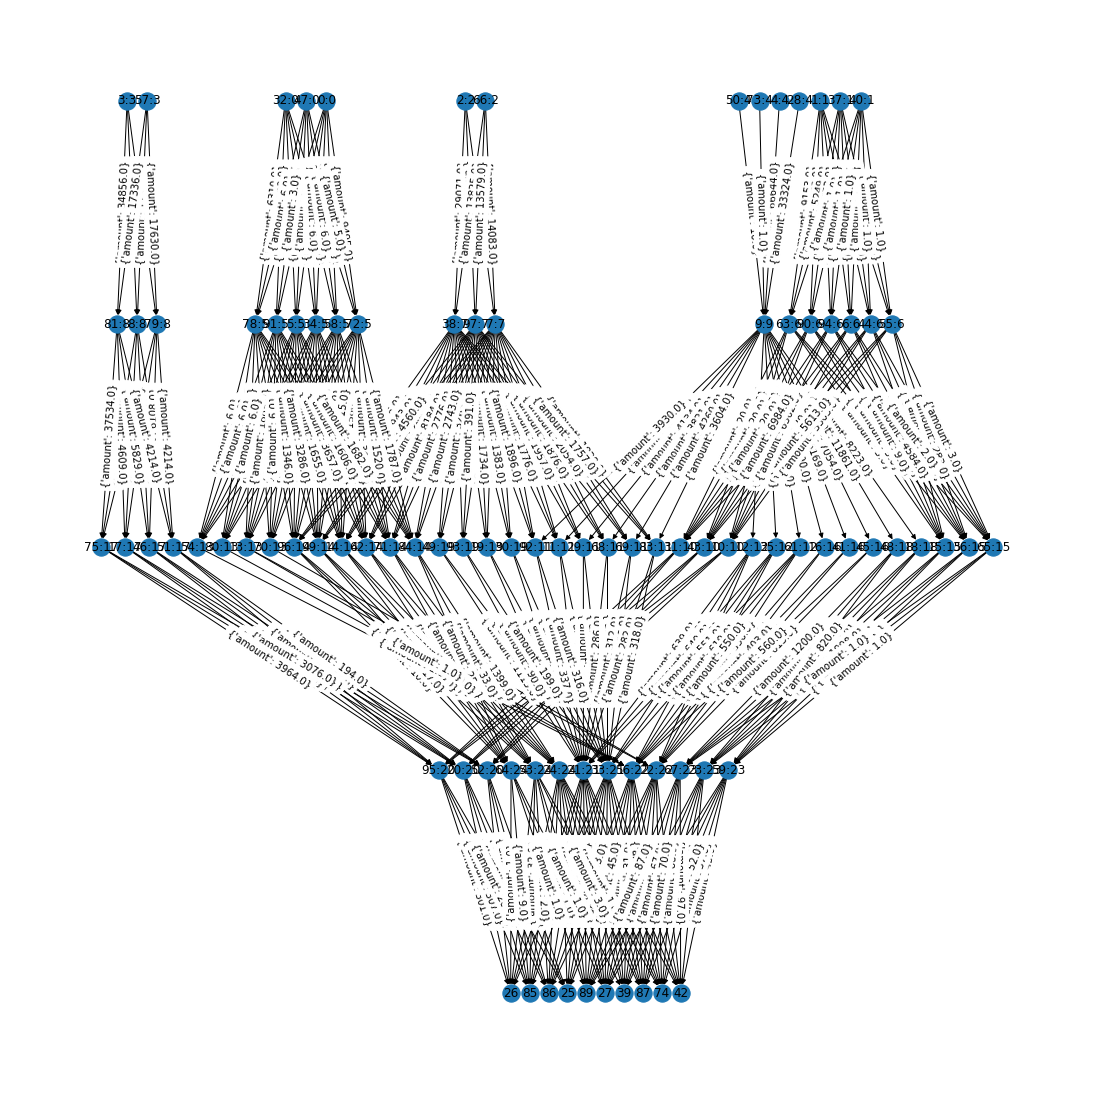

In [37]:
plt.figure(figsize=(15, 15))
#nx.draw_kamada_kawai(G, arrows=True)
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

# Balance

In [38]:
balance_df = econ_sim.read_tick_log_to_df(open("/tmp/balance.log", "rb"), index_name="agent", column_names=["balance"])
balance_df.reset_index(inplace=True)

In [39]:
balance_df[balance_df["tick"] == balance_df["tick"].min()].set_index("agent")

,tick,balance
agent,,
0,0,905.747302
1,0,715.304422
2,0,583.495859
3,0,124.209861
4,0,596.235599
...,...,...
95,0,300950.000000
96,0,50700.000000
97,0,1400.000000


In [40]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent")

,tick,balance
agent,,
0,99999,4.207105e+03
1,99999,2.364791e+03
2,99999,8.431456e+03
3,99999,1.835625e+04
4,99999,1.213676e+05
...,...,...
95,99999,2.366474e+06
96,99999,4.908586e+05
97,99999,2.692704e+05


<AxesSubplot:xlabel='tick'>

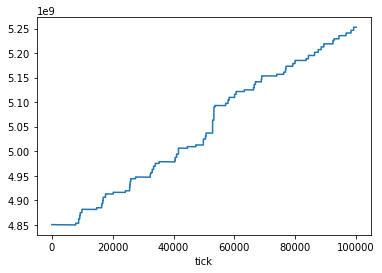

In [41]:
balance_df.groupby("tick")["balance"].sum().plot()

In [42]:
balance_df[balance_df["tick"] == balance_df["tick"].min()]["balance"].describe()

count    1.000000e+02
mean     4.850309e+07
std      3.025324e+08
min      1.242099e+02
25%      1.400000e+03
50%      1.327500e+04
75%      5.070000e+04
max      2.147640e+09
Name: balance, dtype: float64

In [43]:
balance_df[balance_df["tick"] == balance_df["tick"].max()]["balance"].describe()

count    1.000000e+02
mean     5.252573e+07
std      2.960708e+08
min      5.962356e+02
25%      6.815812e+03
50%      4.485041e+05
75%      4.413039e+06
max      2.104192e+09
Name: balance, dtype: float64

In [44]:
ltb_df = balance_df[balance_df["tick"] == balance_df["tick"].max()]

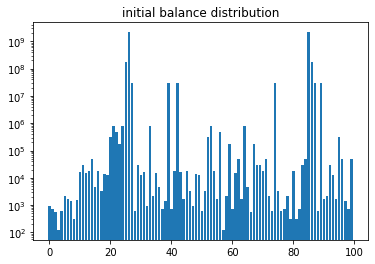

In [45]:
plt.bar(balance_df[balance_df["tick"] == balance_df["tick"].min()]["agent"], balance_df[balance_df["tick"] == balance_df["tick"].min()]["balance"])
plt.title("initial balance distribution")
plt.yscale("log")

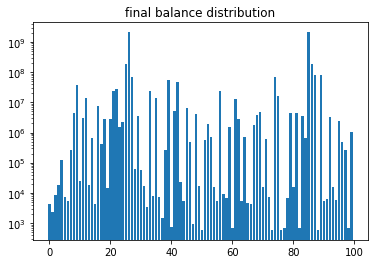

In [46]:
plt.bar(balance_df[balance_df["tick"] == balance_df["tick"].max()]["agent"], balance_df[balance_df["tick"] == balance_df["tick"].max()]["balance"])
plt.title("final balance distribution")
plt.yscale("log")

In [47]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent")["balance"]-balance_df[balance_df["tick"] == balance_df["tick"].min()].set_index("agent")["balance"]

agent
0     3.301358e+03
1     1.649486e+03
2     7.847960e+03
3     1.823205e+04
4     1.207714e+05
          ...     
95    2.065524e+06
96    4.401586e+05
97    2.678704e+05
98    0.000000e+00
99    1.027816e+06
Name: balance, Length: 100, dtype: float64

In [48]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent")["balance"]

agent
0     4.207105e+03
1     2.364791e+03
2     8.431456e+03
3     1.835625e+04
4     1.213676e+05
          ...     
95    2.366474e+06
96    4.908586e+05
97    2.692704e+05
98    7.153044e+02
99    1.078516e+06
Name: balance, Length: 100, dtype: float64

In [49]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].head(50)

,agent,tick,balance
9999900,0,99999,4.207105e+03
9999901,1,99999,2.364791e+03
9999902,2,99999,8.431456e+03
9999903,3,99999,1.835625e+04
9999904,4,99999,1.213676e+05
9999905,5,99999,7.397605e+03
9999906,6,99999,5.468166e+03
9999907,7,99999,2.721629e+05
9999908,8,99999,4.413059e+06
9999909,9,99999,3.795815e+07


<AxesSubplot:>

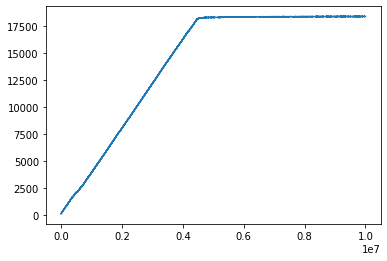

In [50]:
balance_df[balance_df["agent"] == 3]["balance"].plot()

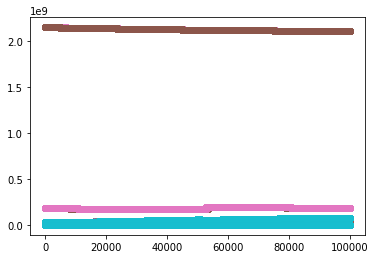

In [51]:
for agent in balance_df["agent"].unique():
    plt.scatter(balance_df[balance_df["agent"] == agent]["tick"], balance_df[balance_df["agent"] == agent]["balance"])


In [52]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].drop("tick", axis=1).set_index("agent") / balance_df[balance_df["tick"] == balance_df["tick"].min()].drop("tick", axis=1).set_index("agent")

,balance
agent,
0,4.644900
1,3.305992
2,14.449899
3,147.784199
4,203.556529
...,...
95,7.863345
96,9.681629
97,192.335998


# Inventory

In [53]:
#columns = list(map(lambda x: str(x), range(production_chain_df.shape[0])))
columns=None
inventory_df = econ_sim.read_tick_log_to_df(open("/tmp/inventory.log", "rb"), index_name="agent", column_names=columns)
inventory_df.reset_index(inplace=True)

## Last Tick Inventory

In [54]:
inventory_df[inventory_df["tick"] == inventory_df["tick"].max()]

,agent,tick,0,1,2,3,4,5,6,7,...,18,19,20,21,22,23,24,25,26,27
9999900,0,99999,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999901,1,99999,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999902,2,99999,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999903,3,99999,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999904,4,99999,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,95,99999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999996,96,99999,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999997,97,99999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999998,98,99999,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Produced Goods Inventory

In [55]:
agent_goods_df * inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent")

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,tick
0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
98,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### Input Resources Inventory

In [56]:
inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent") - agent_goods_df * inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent")

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,tick
agent,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
96,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [57]:
(inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent") - agent_goods_df * inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent")) - (agent_goods_df @ production_chain_df.T)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,tick
agent,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
97,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Production Surplus/Deficit

In [58]:
agent_id = 25
inv_s = inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent").loc[agent_id].drop("tick")
need_s = (agent_goods_df.loc[agent_id] @ production_chain_df.T)
batch_s = (agent_goods_df * production_chain.batch_sizes[np.newaxis,:]).loc[agent_id] @ production_chain_df.T
deficit_df = pd.DataFrame({"inventory":inv_s, "unit_need":need_s, "batch_need": batch_s, "surplus":inv_s - batch_s, "batches":inv_s/batch_s})
deficit_df

,inventory,unit_need,batch_need,surplus,batches
0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,NaN
5,0.0,0.0,0.0,0.0,NaN
6,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,0.0,NaN
9,0.0,0.0,0.0,0.0,NaN


In [59]:
balance_df[(balance_df["agent"] == agent_id) & (balance_df["tick"] == balance_df["tick"].max())]

,agent,tick,balance
9999925,25,99999,1.844561e+08


In [60]:
buy_budget_df[(buy_budget_df["tick"] == buy_budget_df["tick"].max()) & (buy_budget_df["agent"] == agent_id)].T

,9999925
agent,2.500000e+01
tick,9.999900e+04
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
5,0.000000e+00
6,0.000000e+00
7,0.000000e+00


In [61]:
inventory_df[inventory_df["agent"] == agent_id].drop("agent", axis=1).set_index("tick")[agent_id].describe()

count    100000.000000
mean          0.000010
std           0.003162
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: 25, dtype: float64

# Buy and Sell Prices

In [62]:
max_last_buy_price = buy_price_df[buy_price_df["tick"] == buy_price_df["tick"].max()].drop(["agent", "tick"], axis=1).max(axis=0)
min_last_sell_price = sell_price_df[sell_price_df["tick"] == sell_price_df["tick"].max()].drop(["agent", "tick"], axis=1).min(axis=0)
#max_last_buy_price - min_last_sell_price
min_last_sell_price

0     9.425270e+00
1     1.346956e+01
2     1.165041e+01
3     2.579014e+00
4     1.037644e+01
5     9.425598e+00
6     1.346956e+01
7     1.165046e+01
8     2.579100e+00
9     4.154381e+01
10    8.086583e+01
11    2.737640e+03
12    2.150782e+03
13    5.657992e+01
14    1.874106e+02
15    2.694137e+01
16    2.748983e+03
17    2.636935e+01
18    1.749247e+03
19    4.680408e+01
20    8.140997e+02
21    1.520726e+05
22    7.803126e+04
23    1.292455e+04
24    3.211596e+03
25    3.426822e+07
26    2.014949e+08
27    3.630818e+06
dtype: float64

## Market Analysis for one Good

In [63]:
product_id = 21
min_ticks = 0
max_ticks = np.inf

df1 = sell_price_df[(sell_price_df[product_id] < np.inf) & (sell_price_df["tick"].between(min_ticks,max_ticks))].groupby("tick")[product_id].min().to_frame().reset_index()
dfms = min_sell_price_df[(min_sell_price_df[product_id] < np.inf) & (min_sell_price_df["tick"].between(min_ticks, max_ticks))].groupby("tick")[product_id].min().to_frame().reset_index()
df2 = buy_price_df[(buy_price_df["tick"].between(min_ticks, max_ticks)) & (buy_price_df[product_id] > 0)][["tick", "agent", product_id]]
dfmb = max_buy_price_df[(max_buy_price_df["tick"].between(min_ticks, max_ticks)) & (max_buy_price_df[product_id] > 0)][["tick", "agent", product_id]]

buyer_df = buy_budget_df[buy_budget_df[product_id] > 0][["tick", "agent", product_id]].merge(df2, on=["tick", "agent"], suffixes=["_budget", "_price"])
buyer_df["units"] = buyer_df[f'{product_id}_budget'] / buyer_df[f'{product_id}_price']
seller_df = inventory_df[inventory_df["agent"].isin(np.where(agent_goods_df[product_id])[0])].groupby("tick")[product_id].sum()
seller_df = seller_df.loc[min_ticks:max_ticks]


3.0


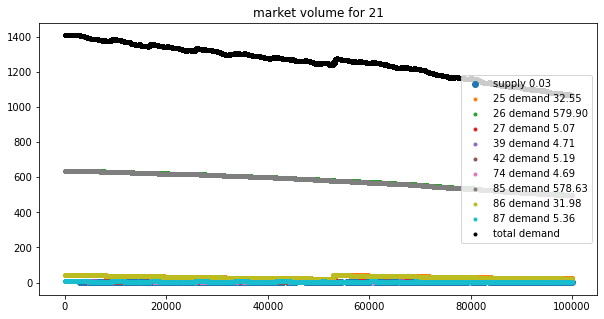

In [64]:
colors = plt.rcParams['axes.prop_cycle'].by_key()["color"]
plt.figure(figsize=(10,5))
plt.scatter(seller_df[seller_df>0].index, seller_df[seller_df>0], label=f'supply {seller_df.mean():.2f}')
for agent_id, color in zip(buyer_df["agent"].unique(), colors[1:]):
    plt.scatter(buyer_df[buyer_df["agent"] == agent_id]["tick"], buyer_df[buyer_df["agent"] == agent_id]["units"], label=f'{agent_id} demand {buyer_df[buyer_df["agent"] == agent_id]["units"].mean():.2f}', marker=".")
total_demand = buyer_df.groupby("tick")["units"].sum()
plt.scatter(total_demand.index, total_demand, label="total demand", marker=".", color="black")
plt.legend(loc="right")
plt.title(f'market volume for {product_id}')
print(seller_df.max())

Text(0.5, 1.0, 'price chart for 21')

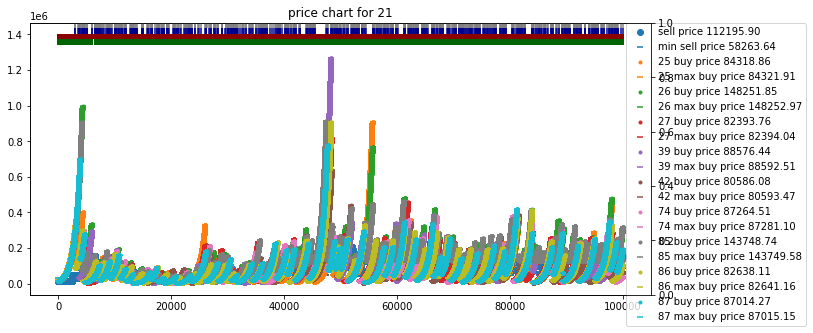

In [65]:
colors = plt.rcParams['axes.prop_cycle'].by_key()["color"]
plt.figure(figsize=(15,5))
plt.scatter(df1["tick"], df1[product_id], label=f'sell price {df1[product_id].mean():.2f}', color=colors[0])
plt.scatter(dfms["tick"], dfms[product_id], label=f'min sell price {dfms[product_id].mean():.2f}', marker="_", color=colors[0])
for agent, color in zip(df2["agent"].unique(), colors[1:]):
    plt.scatter(df2[df2["agent"] == agent]["tick"], df2[df2["agent"] == agent][product_id], label=f'{agent} buy price {df2[df2["agent"] == agent][product_id].mean():.2f}', marker=".", color=color)
    plt.scatter(dfmb[dfmb["agent"] == agent]["tick"], dfmb[dfmb["agent"] == agent][product_id], label=f'{agent} max buy price {dfmb[dfmb["agent"] == agent][product_id].mean():.2f}', marker="_", color=color)
plt.ylim(plt.ylim()[0], plt.ylim()[1]*1.1)

#plt.legend(loc="right")
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

# some status indicators
ax2 = plt.twinx()
ax2.vlines(transaction_df[(transaction_df["product"] == product_id) & transaction_df["tick"].between(min_ticks, max_ticks)]["tick"], ymin=0.98, ymax=1, color="gray")
ax2.vlines(seller_df[seller_df>0].index, ymin=0.96, ymax=0.98, color="darkblue")
ax2.vlines((buyer_df.groupby("tick")["units"].sum() > 0).index, ymin=0.94, ymax=0.96, color="darkred")
ax2.vlines(df1[(df2.groupby("tick")[product_id].max() - df1[product_id])>0].index, ymin=0.92, ymax=0.94, color="darkgreen")
ax2.set_ylim(0,1)
plt.subplots_adjust(right=0.7)

plt.title(f'price chart for {product_id}')

#plt.tight_layout(rect=[0, 0, 0.75, 1])



(0.0, 2253616643.1280794)

<Figure size 432x288 with 0 Axes>

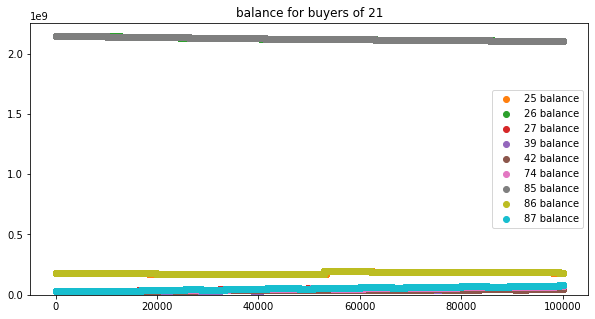

In [66]:
plt.subplots_adjust(right=0.7)
colors = plt.rcParams['axes.prop_cycle'].by_key()["color"]
plt.figure(figsize=(10,5))
for agent, color in zip(df2["agent"].unique(), colors[1:]):
    plt.scatter(balance_df[balance_df["agent"] == agent]["tick"], balance_df[balance_df["agent"] == agent]["balance"], color=color, label=f'{agent} balance')
plt.title(f'balance for buyers of {product_id}')
plt.legend(loc="right")
plt.ylim(0)

In [67]:
transaction_df[transaction_df["product"] == product_id].groupby("buyer")["amount"].sum()

buyer
25     42.0
26    137.0
27     47.0
39     48.0
42     49.0
74     47.0
85    139.0
86     43.0
87     46.0
89     48.0
Name: amount, dtype: float64

In [68]:
transaction_df[transaction_df["product"] == product_id].groupby("buyer")["tick"].describe()

,count,mean,std,min,25%,50%,75%,max
buyer,,,,,,,,
25,42.0,48257.738095,28884.409059,2992.0,23324.75,49449.0,71278.50,98058.0
26,135.0,59277.800000,26078.955636,4281.0,39284.00,63758.0,81787.50,99005.0
27,47.0,47801.382979,28969.426313,3464.0,22821.00,48397.0,71511.50,98150.0
39,45.0,48755.688889,29159.054436,3564.0,23224.00,48304.0,73856.00,98515.0
42,48.0,47367.979167,29299.074410,3585.0,21804.25,46785.5,71516.75,99087.0
74,46.0,47992.260870,28727.260882,3601.0,23219.75,48282.5,70870.25,98652.0
85,136.0,58808.154412,26596.110370,4178.0,38788.00,63535.5,81710.00,99947.0
86,43.0,47905.534884,28439.364126,3006.0,22832.50,49458.0,70039.00,98088.0
87,46.0,48592.173913,28591.159925,3879.0,24158.75,48333.5,70955.75,98858.0


In [69]:
transaction_df[transaction_df["product"] == product_id].groupby("buyer")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
buyer,,,,,,,,
25,42.0,170822.124764,88359.891935,48398.338079,116394.927614,160522.326676,205117.695144,554287.801820
26,135.0,165618.159612,78669.097899,31994.207185,126894.787204,154679.993850,186856.023572,557347.410299
27,47.0,159576.744341,84114.617091,34884.699495,113021.965959,159338.126259,200517.226351,521100.072636
39,45.0,168753.572609,111269.171665,37159.005076,106273.882718,158167.959192,203442.619825,746336.098174
42,48.0,157872.408411,77268.063398,39435.268483,104400.855978,151288.938821,202086.936148,431830.092481
74,46.0,169152.117789,86148.185892,44736.937264,114841.703606,173737.522695,212287.554966,533304.212958
85,136.0,163626.258102,74368.724873,38111.935811,129758.349388,156681.223874,195853.845092,565322.896158
86,43.0,166447.372328,90220.388965,34146.388460,98155.806922,168159.323152,210559.740838,566507.971854
87,46.0,168021.079900,89636.782652,32637.956570,105146.291721,164810.223101,211830.909734,502255.400694


### Buy/Sell Price Investigation

In [70]:
df1[product_id].describe()

count    100000.000000
mean         50.591997
std          14.348248
min          46.607919
25%          46.930566
50%          47.188090
75%          47.786959
max         264.619934
Name: 19, dtype: float64

In [71]:
df2.groupby("agent")[product_id].describe()

,count,mean,std,min,25%,50%,75%,max
agent,,,,,,,,
21,100000.0,46.632736,53.983921,7.563986,32.057118,45.098558,48.570897,839.358324
33,100000.0,55.683918,180.834172,5.522283,32.241421,44.559105,48.359048,5060.805887


In [72]:
df2[df2["tick"] == df2["tick"].max()][product_id].max() - df1[product_id].iloc[-1]

-1.2770253387639698

In [73]:
(df2.groupby("tick")[product_id].max() - df1.set_index("tick")[product_id]).describe()

count    100000.000000
mean         11.494720
std         176.794952
min        -133.155613
25%          -4.058515
50%           0.408083
75%           2.030254
max        4927.888791
Name: 19, dtype: float64

In [74]:
dfmb[dfmb["tick"] == dfmb["tick"].max()][product_id].max() - dfms[product_id].iloc[-1]

-1.2770253387639698

In [75]:
(dfmb.groupby("tick")[product_id].max() - dfms.set_index("tick")[product_id]).describe()

count    100000.000000
mean        153.848042
std         518.219669
min         -73.820871
25%          13.439966
50%          34.148161
75%          78.095948
max       16338.896662
Name: 19, dtype: float64

In [76]:
bp_s = (production_goods.loc[product_id] * buy_price_df[buy_price_df["agent"] == product_id].drop(["agent", "tick"], axis=1)).sum(axis=1)
mbp_s = (production_goods.loc[product_id] * max_buy_price_df[max_buy_price_df["agent"] == product_id].drop(["agent", "tick"], axis=1)).sum(axis=1)
sp_s = sell_price_df[sell_price_df["agent"] == product_id].drop(["agent", "tick"], axis=1).min(axis=1)
msp_s = min_sell_price_df[min_sell_price_df["agent"] == product_id].drop(["agent", "tick"], axis=1).min(axis=1)
price_df = pd.DataFrame({"cost":bp_s, "max_cost":mbp_s, "price":sp_s, "min_price":msp_s, "unit_profit":sp_s-bp_s})
price_df

,cost,max_cost,price,min_price,unit_profit
19,112.000000,222.055109,262.000000,111.220052,150.000000
119,112.000000,262.000000,260.690000,112.000000,148.690000
219,112.560000,262.000000,260.690000,112.000000,148.130000
319,113.122800,262.000000,260.690000,112.000000,147.567200
419,113.688414,262.000000,260.690000,112.000000,147.001586
...,...,...,...,...,...
9999519,46.872849,46.872849,46.865966,46.865966,-0.006883
9999619,46.872849,46.872849,46.865966,46.865966,-0.006883
9999719,46.872849,46.872849,46.865966,46.865966,-0.006883
9999819,46.872849,46.872849,46.865966,46.865966,-0.006883


## Larger Scale Market Analysis

In [ ]:
demand_units_df = (buy_budget_df.set_index(["agent", "tick"]) / buy_price_df.set_index(["agent", "tick"])).fillna(0.)
supply_units_df = (inventory_df.drop("tick", axis=1).set_index("agent") * agent_goods_df).rename_axis('agent').reset_index(level=0)
supply_units_df["tick"] = inventory_df["tick"]

In [ ]:
demand_units_df.groupby("tick").sum().mean() - supply_units_df.groupby("tick").sum().mean()

In [ ]:
(demand_units_df.groupby("tick").sum()).std()/(demand_units_df.groupby("tick").sum()).mean()

In [ ]:
(supply_units_df.groupby("tick").sum()).std()/(supply_units_df.groupby("tick").sum()).mean()

# Profit Analysis

In [ ]:
revenue = transaction_df.groupby("seller")["value"].sum()
costs = transaction_df.groupby("buyer")["value"].sum()

In [ ]:
costs

In [ ]:
revenue

In [ ]:
revenue-costs

In [ ]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent") - balance_df[balance_df["tick"] == balance_df["tick"].min()].set_index("agent")

# Production Efficiency

In [ ]:
production_efficiency_df = econ_sim.read_tick_log_to_df(open("/tmp/production_efficiency.log", "rb"), index_name="agent")

In [ ]:
production_efficiency_df.reset_index()[production_efficiency_df.reset_index()["agent"] == 4][4].describe()

In [ ]:
production_efficiency_df.reset_index()[production_efficiency_df.reset_index()["agent"] == 4][["tick",4]].head(50)

In [ ]:
balance_df[balance_df["agent"] == 4].head(50)

In [ ]:
production_efficiency_df.index.to_frame()["tick"]

In [ ]:
production_efficiency_df[production_efficiency_df.index.to_frame()["tick"] < 10000].groupby("tick").max()[4].plot()

In [ ]:
buy_price_df[(buy_price_df["tick"] < 10000)].groupby("tick")[3].max().plot()
plt.ylim(0)

In [ ]:
sell_price_df[(sell_price_df["tick"] < 10000)].groupby("tick")[3].min().plot()

In [ ]:
sell_price_df.groupby("tick")[3].min().describe()

In [ ]:
inventory_df[(inventory_df["tick"] < 1000) & (inventory_df["agent"] == 3)].groupby("tick")[3].max().plot()

In [ ]:
transaction_df[(transaction_df["tick"] < 10000) & (transaction_df["seller"] == 3)].groupby("tick")["amount"].sum().plot(marker="o", linestyle='none')

In [ ]:
transaction_df[(transaction_df["tick"] < 10000) & (transaction_df["seller"] == 3)]